In [1]:
# import packages
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
 
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import numpy as np

In [2]:
NUM_EPOCHS = 50
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
\transform = transforms.Compose([
    transforms.ToTensor(),
])

In [3]:
trainset = datasets.FashionMNIST(
    root='./data',
    train=True, 
    download=True,
    transform=transform
)
testset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
trainloader = DataLoader(
    trainset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = DataLoader(
    testset, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

In [4]:
def get_device():
        device = 'mps'
        return device
def make_dir():
    image_dir = 'FashionMNIST_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decoded_image(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, './FashionMNIST_Images/linear_ae_image{}.png'.format(epoch))


In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder_stack = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=8, 
                        kernel_size=3, stride=2, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(in_channels=8, out_channels=16, 
                        kernel_size=3, stride=2, padding=1),
                nn.BatchNorm2d(16),
                nn.ReLU(inplace=True),
                nn.Conv2d(in_channels=16, out_channels=32, 
                        kernel_size=3, stride=2, padding=0),
                nn.ReLU(inplace=True),
                nn.Flatten(start_dim=1),
                nn.Linear(3*3*32, 128),
                nn.ReLU(inplace=True),
                nn.Linear(128, 8))


        self.decoder_stack = nn.Sequential(
                nn.Linear(8, 128),
                nn.ReLU(inplace=True),
                nn.Linear(128, 3*3*32),
                nn.ReLU(inplace=True),
                nn.Unflatten(dim=1, unflattened_size=(32,3,3)),
                nn.ConvTranspose2d(32,16,3, stride=2, output_padding=0),
                nn.BatchNorm2d(16),
                nn.ReLU(inplace=True),
                nn.ConvTranspose2d(16,8,3, stride=2, padding=1, output_padding=1),
                nn.BatchNorm2d(8),
                nn.ReLU(True),
                nn.ConvTranspose2d(8,1,3, stride=2, padding=1, output_padding=1))


    def forward(self, x):
        encoded_x = self.encoder_stack(x)
        decoded_x = self.decoder_stack(encoded_x)
        x = torch.sigmoid(decoded_x)
        return x
    
net = Autoencoder()

Autoencoder(
  (encoder_stack): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=288, out_features=128, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=128, out_features=8, bias=True)
  )
  (decoder_stack): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1

In [6]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [7]:
list = []

def train(net, trainloader, NUM_EPOCHS):
    train_loss = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for data in trainloader:
            img, _ = data
            img = img.to(device)
            optimizer.zero_grad()
            output = net(img)
            loss = criterion(output, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, NUM_EPOCHS, loss))

        if epoch % 5 == 0:
            save_decoded_image(output.cpu().data, epoch)

    return train_loss



mps
Epoch 1 of 50, Train Loss: 0.052
Epoch 2 of 50, Train Loss: 0.020
Epoch 3 of 50, Train Loss: 0.018
Epoch 4 of 50, Train Loss: 0.017
Epoch 5 of 50, Train Loss: 0.016
Epoch 6 of 50, Train Loss: 0.016
Epoch 7 of 50, Train Loss: 0.015
Epoch 8 of 50, Train Loss: 0.015
Epoch 9 of 50, Train Loss: 0.015
Epoch 10 of 50, Train Loss: 0.015
Epoch 11 of 50, Train Loss: 0.014
Epoch 12 of 50, Train Loss: 0.014
Epoch 13 of 50, Train Loss: 0.014
Epoch 14 of 50, Train Loss: 0.014
Epoch 15 of 50, Train Loss: 0.014
Epoch 16 of 50, Train Loss: 0.014
Epoch 17 of 50, Train Loss: 0.014
Epoch 18 of 50, Train Loss: 0.014
Epoch 19 of 50, Train Loss: 0.014
Epoch 20 of 50, Train Loss: 0.014
Epoch 21 of 50, Train Loss: 0.014
Epoch 22 of 50, Train Loss: 0.014
Epoch 23 of 50, Train Loss: 0.014
Epoch 24 of 50, Train Loss: 0.013
Epoch 25 of 50, Train Loss: 0.013
Epoch 26 of 50, Train Loss: 0.013
Epoch 27 of 50, Train Loss: 0.013
Epoch 28 of 50, Train Loss: 0.013
Epoch 29 of 50, Train Loss: 0.013
Epoch 30 of 50, Tra

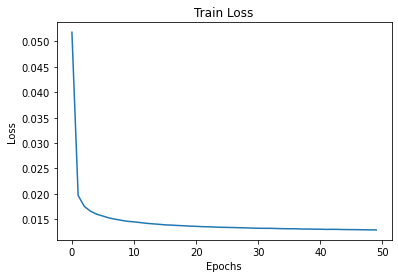

In [8]:
# get the computation device
device = get_device()
print(device)
# load the neural network onto the device
net.to(device)
make_dir()
# train the network
train_loss = train(net, trainloader, NUM_EPOCHS)
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_fashionmnist_loss.png')

In [21]:

def test_image_reconstruction(net, testloader):
    for data in testloader:
        img, _ = data
        img = img.to(device)
        output = net(img)
        outputs = output.view(output.size(0), 1, 28, 28).cpu().data
        save_image(outputs, 'fashionmnist_reconstruction.png')
        plt.imshow(outputs.squeeze(), cmap='gray')
        plt.show()

        

In [12]:
test_image_reconstruction(net, testloader)

In [23]:
testing_imgs = testset.data.numpy()
testing_imgs = testing_imgs[:, np.newaxis, :, :]
testing_imgs = torch.from_numpy(testing_imgs).type(torch.float32)
testing_imgs = testing_imgs.to('mps')
encoded_test_data = net.encoder_stack(testing_imgs)

test_data = encoded_test_data.data.cpu().numpy()

In [55]:
finalEncoder[0][0]

tensor([0.2144, 0.0000, 0.0000, 0.0000, 0.0000, 0.5765, 0.0000, 0.0000],
       device='mps:0', grad_fn=<SelectBackward0>)

In [58]:
print(finalEncoder[0])
T = finalEncoder[0]

for i in range(1,10000):
    T = torch.cat((T,finalEncoder[i]), 0)
        
T

tensor([[0.2144, 0.0000, 0.0000, 0.0000, 0.0000, 0.5765, 0.0000, 0.0000]],
       device='mps:0', grad_fn=<ReluBackward0>)


tensor([[0.2144, 0.0000, 0.0000,  ..., 0.5765, 0.0000, 0.0000],
        [0.0213, 0.0000, 0.0000,  ..., 0.5776, 0.0000, 0.1744],
        [0.3433, 0.0000, 0.0000,  ..., 0.8501, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.1605, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1605, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1605, 0.0000, 0.0000]],
       device='mps:0', grad_fn=<CatBackward0>)

In [59]:
T.shape

torch.Size([10000, 8])

In [24]:
# test_data = test_data.data.cpu().numpy()
# test_data.shape

from sklearn.manifold import TSNE

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(test_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 0.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.892936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.793991
[t-SNE] KL divergence after 1000 iterations: 1.489702


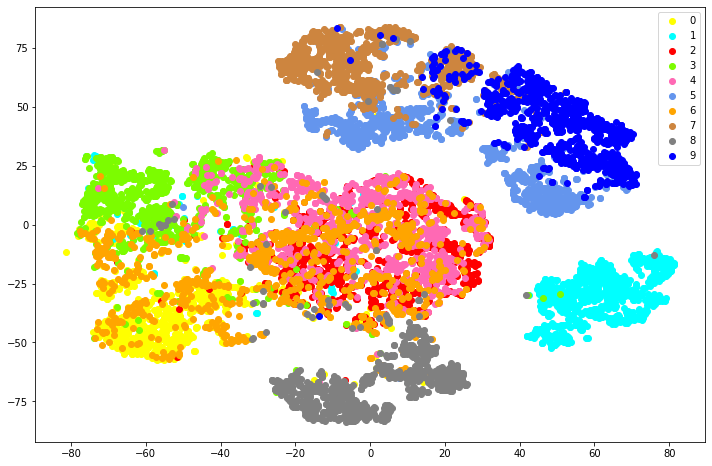

In [26]:
from matplotlib import cm

len(testset.classes)
labels_map = {
    0: ["yellow", "T-Shirt"],
    1: ["cyan", "Trouser"],
    2: ["red", "Pullover"],
    3: ["lawngreen", "Dress"],
    4: ["hotpink", "Coat"],
    5: ["cornflowerblue", "Sandal"],
    6: ["orange", "Shirt"],
    7: ["peru", "Sneaker"],
    8: ["gray", "Bag"],
    9: ["blue", "Ankle Boot"]}


fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(testset.classes)):
    idx = np.argwhere(testset.targets.numpy() == i)
    plt.scatter(tsne_proj[idx,0], tsne_proj[idx,1], c=labels_map[i][0], label= i)

ax.legend()
plt.show()